# Packages

In [5]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import numpy as np
from sklearn.linear_model import LinearRegression


# run for saving images (error previously without this code) but keep hidden until need to save images
# import matplotlib
# matplotlib.use("Agg")

# Initial Data:

In [57]:
# create variables for file paths from both datasets
file_path1 = 'Data/Gradients5_TN412_NutrientsUW.csv'
file_path2 = 'Data/Influx_Underway_Gradients_2023v1_0.csv'

# read the CSV files into a DataFrame: categorize by nutrients and phytoplankton 
nutrient_data = pd.read_csv(file_path1, sep= ',')
phytoplankton_data = pd.read_csv(file_path2, sep= ',')

# display the DataFrames to check the data
# display(nutrient_data)
# display(phytoplankton_data)

# Print column names for reference

In [58]:
print('Nutrient columns:', nutrient_data.columns)
print('Phytoplankton columns:', phytoplankton_data.columns) 

Nutrient columns: Index(['time', 'lat', 'lon', 'depth', 'Temp', 'Salinity', 'Si', 'SRP', 'TDP',
       'DOP', 'NplusN', 'TDN', 'DON', 'NH4', 'NO2', 'Ratio_TDN_TDP',
       'Ratio_DON_DOP'],
      dtype='object')
Phytoplankton columns: Index(['time', 'lat', 'lon', 'depth', 'cell_abundance_picoeuk',
       'cell_abundance_prochloro', 'cell_abundance_synecho',
       'diameter_picoeuk', 'diameter_prochloro', 'diameter_synecho',
       'carbon_quota_picoeuk', 'carbon_quota_prochloro',
       'carbon_quota_synecho', 'carbon_biomass_picoeuk',
       'carbon_biomass_prochloro', 'carbon_biomass_synecho'],
      dtype='object')


# Make function for filtering data

In [59]:
# create a function to filter data by longitude
def filter_data_by_longitude(data, lon_range):
    return data[(data['lon'] >= lon_range[0]) & (data['lon'] <= lon_range[1])]

# Clean Data for -141 to -139 longitude range (-140 (+/- 1))

In [60]:
# round latitude and longitude to 1 degree
nutrient_data[['lat', 'lon']] = nutrient_data[['lat', 'lon']].round(1)
phytoplankton_data[['lat', 'lon']] = phytoplankton_data[['lat', 'lon']].round(1)

# # filter data based on longitude values in the range of -140 (+/- 1)
lon_range = (-141, -139)
nutrient_data_filtered = filter_data_by_longitude(nutrient_data, lon_range)
phytoplankton_data_filtered = filter_data_by_longitude(phytoplankton_data, lon_range)

# merge filtered datasets based on rounded latitude and longitude
merged_data = pd.merge(nutrient_data_filtered, phytoplankton_data_filtered, on=['lat', 'lon'])

# display new data
display(merged_data)

,time_x,lat,lon,depth_x,Temp,Salinity,Si,SRP,TDP,DOP,...,cell_abundance_synecho,diameter_picoeuk,diameter_prochloro,diameter_synecho,carbon_quota_picoeuk,carbon_quota_prochloro,carbon_quota_synecho,carbon_biomass_picoeuk,carbon_biomass_prochloro,carbon_biomass_synecho
0,2023-01-30T15:49:00.000Z,16.0,-140.0,8,24.21,33.92,1.480275,0.210605,0.459433,0.248828,...,14.186894,1.608753,0.538000,0.777993,0.510220,0.030228,0.078295,3.178016,6.065280,1.110817
1,2023-01-31T03:31:00.000Z,14.5,-140.0,8,24.44,33.82,1.605101,0.241539,0.489299,0.247760,...,17.433752,1.789873,0.631800,0.790837,0.672579,0.045760,0.081669,5.075348,5.422930,1.423467
2,2023-01-31T15:20:00.000Z,12.4,-140.0,8,24.94,34.28,2.319211,0.283065,0.506182,0.223116,...,6.747862,1.445783,0.505317,0.790660,0.387431,0.025715,0.081623,4.780908,4.833262,0.550990
3,2023-01-31T15:20:00.000Z,12.4,-140.0,8,24.94,34.28,2.319211,0.283065,0.506182,0.223116,...,6.057520,1.641987,0.560937,0.826223,0.538145,0.033666,0.091440,6.255787,5.641472,0.553650
4,2023-02-01T03:29:00.000Z,11.1,-140.0,8,25.57,34.49,1.794967,0.222213,0.422636,0.200423,...,22.143795,1.855180,0.673397,0.813030,0.736916,0.053944,0.087713,6.768604,7.526195,1.942545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2023-02-10T14:49:00.000Z,-4.0,-140.0,8,26.33,35.28,1.992283,0.624596,0.808696,0.184101,...,7.416099,1.464717,0.503347,0.771587,0.400527,0.025457,0.076648,3.327457,4.456707,0.568368
58,2023-02-10T14:49:00.000Z,-4.0,-140.0,8,26.33,35.28,1.992283,0.624596,0.808696,0.184101,...,7.151486,1.622777,0.543417,0.797763,0.521731,0.031019,0.083536,4.306014,5.099227,0.597716
59,2023-02-10T14:49:00.000Z,-4.0,-140.0,8,26.33,35.28,1.992283,0.624596,0.808696,0.184101,...,8.795240,1.803937,0.619937,0.813010,0.686075,0.043576,0.087706,5.030254,6.339693,0.771325
60,2023-02-10T14:49:00.000Z,-4.0,-140.0,8,26.33,35.28,1.992283,0.624596,0.808696,0.184101,...,8.349400,1.477070,0.505693,0.781697,0.409313,0.025765,0.079260,3.738427,5.059934,0.661946


# Plot of Prochlorococcus and Synechococcus Carbon Quota: Slide 6
Note this originally showed carbon_quota_... should have been carbon_biomass_... which was not noted in presentation. Resolved here in below code cells, error is cell 47, fixed cell 14.

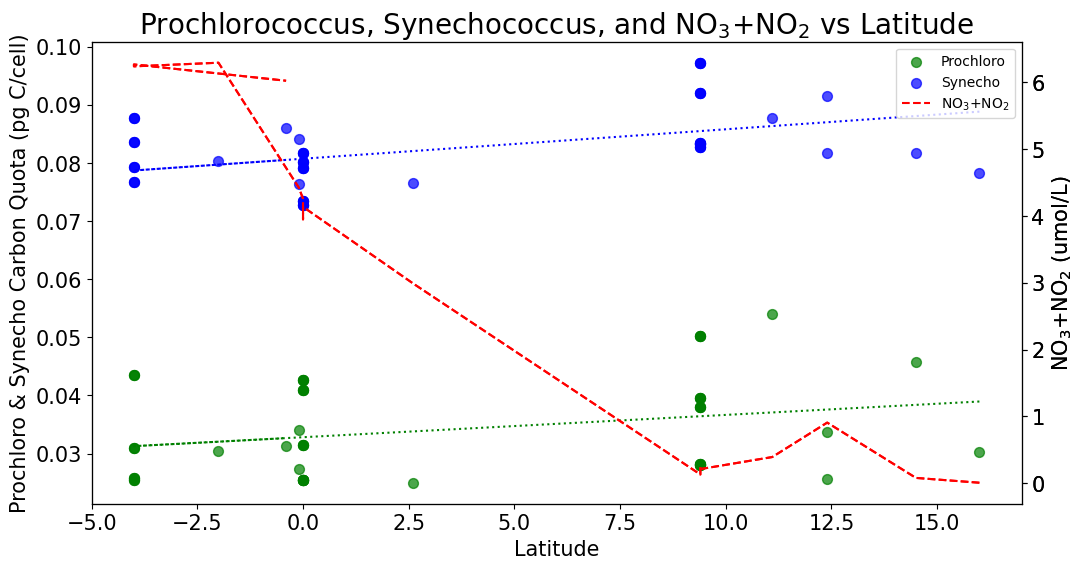

In [51]:
# plot Prochlorococcus and Synechococcus Carbon Quota
fig, ax1 = plt.subplots(figsize=(12, 6))

scatter_prochloro = plot_scatter(ax1, merged_data, 'lat', 'carbon_quota_prochloro', 'Prochloro', 'green')
scatter_synecho = plot_scatter(ax1, merged_data, 'lat', 'carbon_quota_synecho', 'Synecho', 'blue')

# set labels and title for the left y-axis
ax1.set_xlabel('Latitude', fontsize=15)
ax1.set_ylabel('Prochloro & Synecho Carbon Quota (pg C/cell)', color='black', fontsize=15)
ax1.tick_params(axis='y', colors='black', labelsize=15)
ax1.set_title('Prochlorococcus, Synechococcus, and NO$_3$+NO$_2$ vs Latitude', fontsize=20)

# create a twin y-axis for NplusN on the right side
ax2 = ax1.twinx()

# plot NplusN as a dashed line in red
line_nplusn = ax2.plot(
    merged_data['lat'],
    merged_data['NplusN'],
    label='NO$_3$+NO$_2$',
    color='red',
    linestyle='--'
)

# set labels for the right y-axis
ax2.set_ylabel('NO$_3$+NO$_2$ (umol/L)', color='black', fontsize=15)
ax2.tick_params(axis='y', colors='black', labelsize=15)

# show legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# increase tick label font size for both x-axes
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', colors='black', labelsize=15)
ax1.set_title('Prochlorococcus, Synechococcus, and NO$_3$+NO$_2$ vs Latitude', fontsize=20)

# creates twin y-axis for NplusN on the right side
ax2 = ax1.twinx()

# plot NplusN as a dashed line in red, as above comment, line is better to see the realtionship than scatter
line_nplusn = ax2.plot(
    merged_data['lat'],
    merged_data['NplusN'],
    label='NO$_3$+NO$_2$',
    color='red',
    linestyle='--'
)

# set labels: right y-axis
ax2.set_ylabel('NO$_3$+NO$_2$ (umol/L)', color='black', fontsize=15)
ax2.tick_params(axis='y', colors='black', labelsize=15)

# show legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# increase tick label font size (both x-axes)
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)

# show plot
plt.show()

# Plot of Biomass: Slide 6 (or RESOLVED Slide 9)

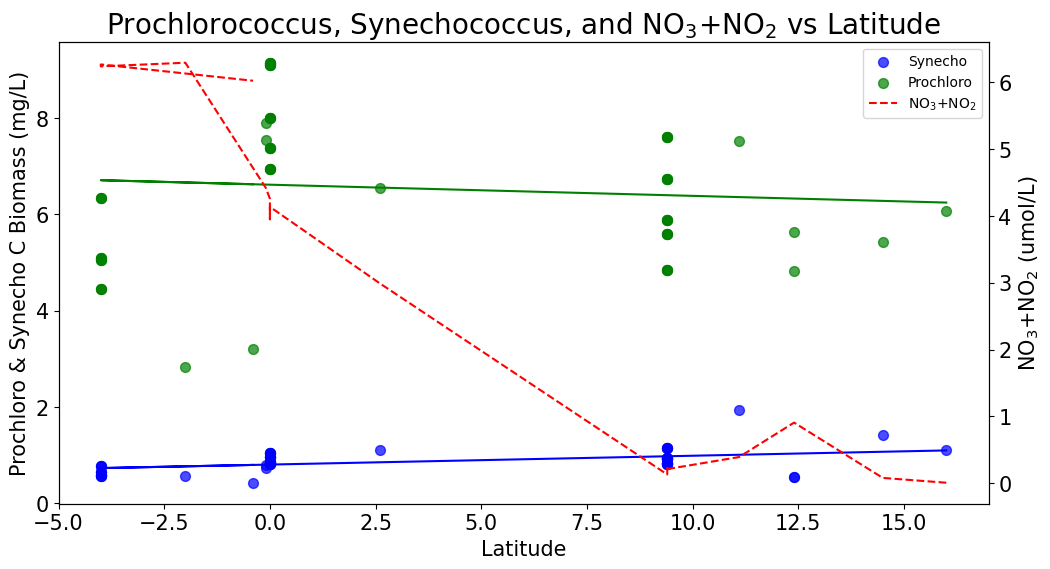

In [52]:
# make a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# plot Biomass for Synechococcus on the left y-axis with regression line
scatter_synecho = ax1.scatter(
    merged_data['lat'],
    merged_data['carbon_biomass_synecho'],
    label='Synecho',
    color='blue',
    s=50,
    alpha=0.7
)


# fit linear regression line
reg_synecho = LinearRegression().fit(np.array(merged_data['lat']).reshape(-1, 1), merged_data['carbon_biomass_synecho'])
line_synecho = reg_synecho.predict(np.array(merged_data['lat']).reshape(-1, 1))
ax1.plot(merged_data['lat'], line_synecho, color='blue')

# plot Biomass for Prochlorococcus on the left y-axis with regression line
scatter_prochloro = ax1.scatter(
    merged_data['lat'],
    merged_data['carbon_biomass_prochloro'],
    label='Prochloro',
    color='green',
    s=50,
    alpha=0.7
)

# fit linear regression line
reg_prochloro = LinearRegression().fit(np.array(merged_data['lat']).reshape(-1, 1), merged_data['carbon_biomass_prochloro'])
line_prochloro = reg_prochloro.predict(np.array(merged_data['lat']).reshape(-1, 1))
ax1.plot(merged_data['lat'], line_prochloro, color='green')

# set labels and title for the left y-axis
ax1.set_xlabel('Latitude', fontsize=15)
ax1.set_ylabel('Prochloro & Synecho C Biomass (mg/L)', color='black', fontsize=15)
ax1.tick_params(axis='y', colors='black', labelsize=15)
ax1.set_title('Prochlorococcus, Synechococcus, and NO$_3$+NO$_2$ vs Latitude', fontsize=20)

# create twin y-axis for Nitrate and Nitrite on the right side
ax2 = ax1.twinx()

# plot Nitrate and Nitrite as a dashed line in red
line_nplusn = ax2.plot(
    merged_data['lat'],
    merged_data['NplusN'],
    label='NO$_3$+NO$_2$',
    color='red',
    linestyle='--'
)

# set labels, legend, and tick marks
ax2.set_ylabel('NO$_3$+NO$_2$ (umol/L)', color='black', fontsize=15)
ax2.tick_params(axis='y', colors='black', labelsize=15)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)

# show plot
plt.show()

# Plot for : Slide 7
Used mpatches.Polygon to draw a box around the transect to be used.

/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


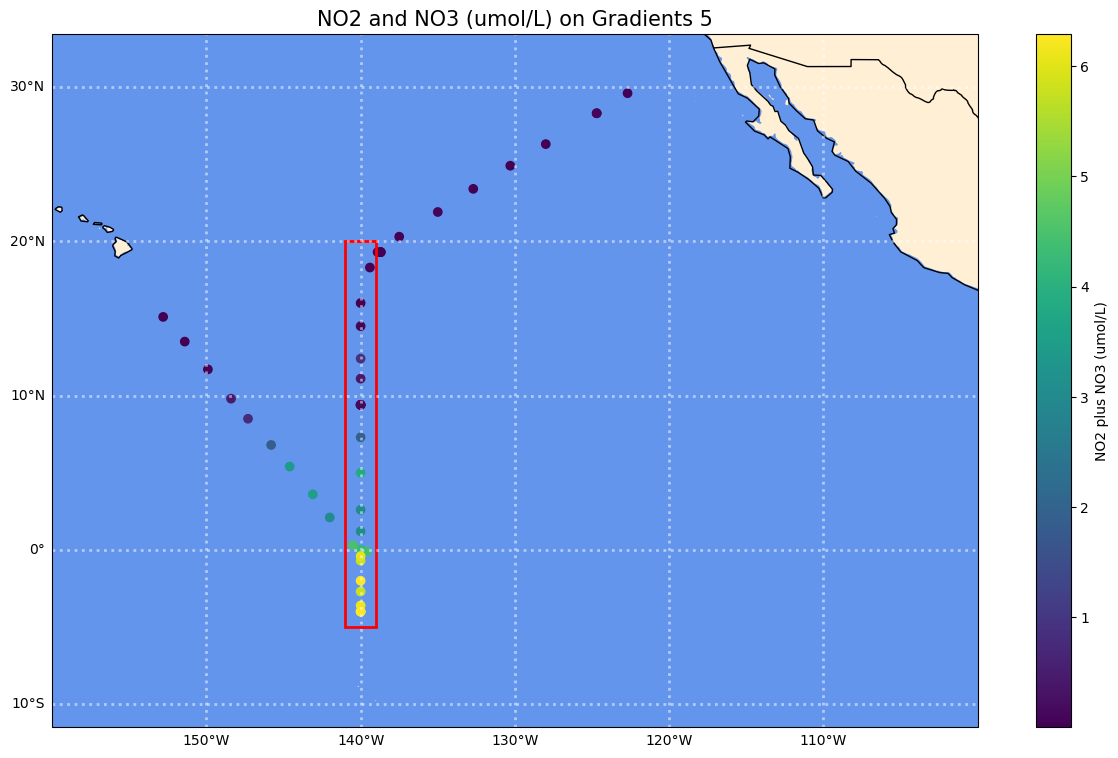

In [53]:
# create graph
figure = plt.figure(figsize = (15,9))
axs = plt.axes(projection = ccrs.PlateCarree())

# set title
axs.set_title('NO2 and NO3 (umol/L) on Gradients 5', size = 15)

# add coastlines to the map, with resolution set to '110m' and color to black
axs.coastlines(resolution = '110m', color = 'k')

# add latitude and longitude gridlines and set to white.
g1 = axs.gridlines(crs = ccrs.PlateCarree(), draw_labels = True, linewidth = 2, color = 'white', 
                  alpha = 0.5, linestyle =':')
g1.xlabels_top = False
g1.ylabels_right = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER

no23 = nutrient_data['NplusN']
lon = nutrient_data['lon']
lat = nutrient_data['lat']

a = axs.scatter(lon, lat, c = no23, transform = ccrs.PlateCarree())
c = plt.colorbar(a)
c.set_label('NO2 plus NO3 (umol/L)')

# add OCEAN, LAND, and BORDERS features
axs.add_feature(cfeature.LAND, color='papayawhip')
axs.add_feature(cfeature.OCEAN, color ='cornflowerblue')
axs.add_feature(cfeature.BORDERS, color='black')

# zoom in for transect
axs.set_extent([-160, -100, -10, 30])

# make a box for -140 with 1 degree tolerance
box_lon = [-141, -139, -139, -141, -141]
box_lat = [-5, -5, 20, 20, -5]
box = mpatches.Polygon(xy=list(zip(box_lon, box_lat)), edgecolor="red", facecolor="none", linewidth=2, transform=ccrs.PlateCarree())
axs.add_patch(box)

# show the plot
plt.show()

# save as an image
# plt.savefig('NO2NO3_Gradients5_box.png', dpi=300, bbox_inches='tight')

# Slide 8
* Note that the plot shown here is what was used on the slides, however in future, change to carbon_biomass_synecho or carbon_biomass_prochloro to report biomass.

/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt

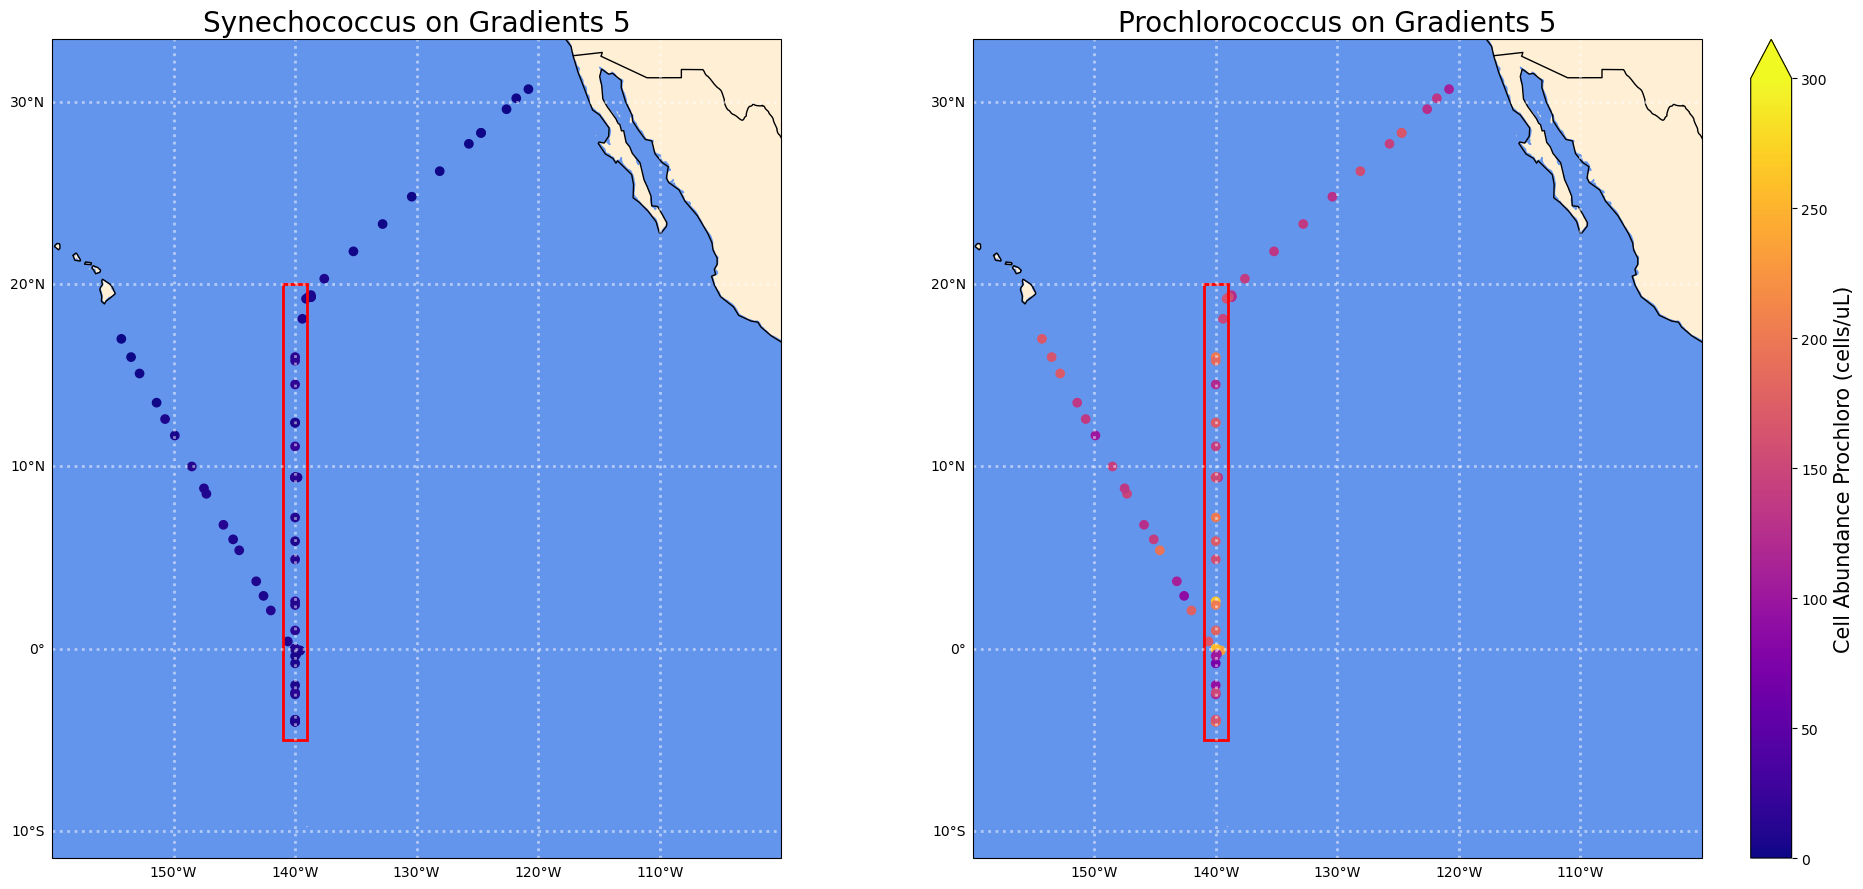

In [54]:

# create a figure and define a grid layout
fig = plt.figure(figsize=(20, 9))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# plot for Synechococcus
axs1 = plt.subplot(gs[0], projection=ccrs.PlateCarree(), aspect=1.5)
axs1.set_title('Synechococcus on Gradients 5', size=20)

axs1.coastlines(resolution='110m', color='k')

g1 = axs1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='white', alpha=0.5, linestyle=':')
g1.xlabels_top = False
g1.ylabels_right = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER

no2 = phytoplankton_data['cell_abundance_synecho']
lon = phytoplankton_data['lon']
lat = phytoplankton_data['lat']

a1 = axs1.scatter(lon, lat, c=no2, transform=ccrs.PlateCarree(), cmap='plasma', vmin=0, vmax=300)

axs1.add_feature(cfeature.LAND, color='papayawhip')
axs1.add_feature(cfeature.OCEAN, color='cornflowerblue')
axs1.add_feature(cfeature.BORDERS, color='black')
axs1.set_extent([-160, -100, -10, 30])

box_lon = [-141, -139, -139, -141, -141]
box_lat = [-5, -5, 20, 20, -5]
box = mpatches.Polygon(xy=list(zip(box_lon, box_lat)), edgecolor="red", facecolor="none", linewidth=2,
                       transform=ccrs.PlateCarree())
axs1.add_patch(box)

axs1.set_xlabel('Longitude', fontsize=12)
axs1.set_ylabel('Latitude', fontsize=12)

# plot for Prochlorococcus
axs2 = plt.subplot(gs[1], projection=ccrs.PlateCarree(), aspect=1.5)
axs2.set_title('Prochlorococcus on Gradients 5', size=20)

axs2.coastlines(resolution='110m', color='k')

g2 = axs2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='white', alpha=0.5, linestyle=':')
g2.xlabels_top = False
g2.ylabels_right = False
g2.xformatter = LONGITUDE_FORMATTER
g2.yformatter = LATITUDE_FORMATTER

proch = phytoplankton_data['cell_abundance_prochloro']
lon = phytoplankton_data['lon']
lat = phytoplankton_data['lat']

a2 = axs2.scatter(lon, lat, c=proch, transform=ccrs.PlateCarree(), cmap='plasma', vmin=0, vmax=300)
c2 = plt.colorbar(a2, extend='max')
c2.set_label('Cell Abundance Prochloro (cells/uL)', fontsize=15)

axs2.add_feature(cfeature.LAND, color='papayawhip')
axs2.add_feature(cfeature.OCEAN, color='cornflowerblue')
axs2.add_feature(cfeature.BORDERS, color='black')
axs2.set_extent([-160, -100, -10, 30])

box_lon = [-141, -139, -139, -141, -141]
box_lat = [-5, -5, 20, 20, -5]
box = mpatches.Polygon(xy=list(zip(box_lon, box_lat)), edgecolor="red", facecolor="none", linewidth=2,
                       transform=ccrs.PlateCarree())
axs2.add_patch(box)
axs2.set_xlabel('Longitude', fontsize=15)
axs2.set_ylabel('Latitude', fontsize=15)

# adjust layout
plt.tight_layout()

# save figure
# plt.savefig('Combined_Gradients.png', dpi=300, bbox_inches='tight')

# show plot
plt.show()


# Final plot: Slide 9

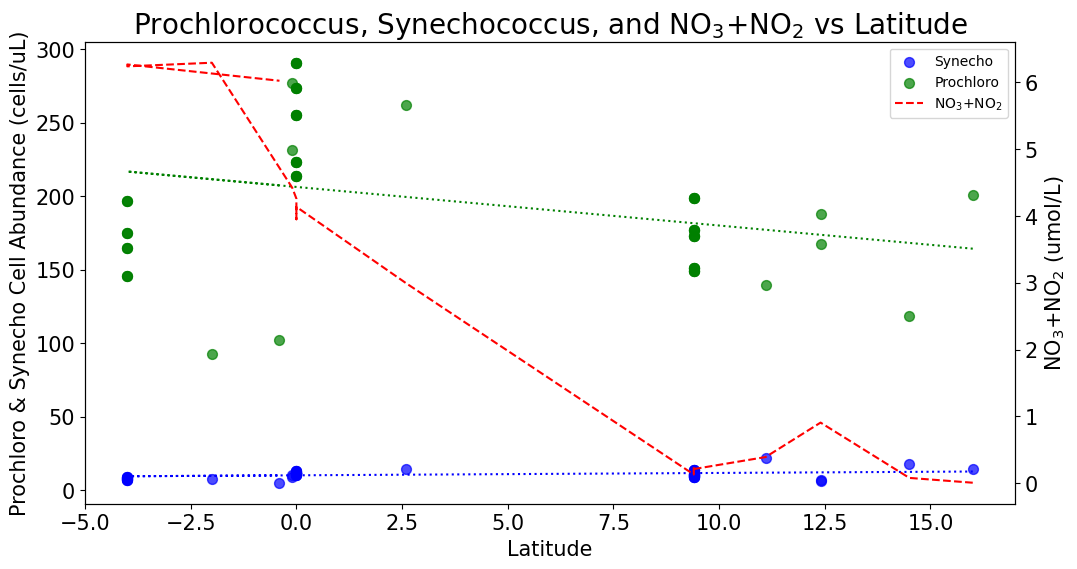

In [55]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot carbon_quota_synecho on the left y-axis with regression line
scatter_synecho = ax1.scatter(
    merged_data['lat'],
    merged_data['cell_abundance_synecho'],
    label='Synecho',
    color='blue',
    s=50,
    alpha=0.7
)

# Fit a linear regression line
reg_synecho = LinearRegression().fit(np.array(merged_data['lat']).reshape(-1, 1), merged_data['cell_abundance_synecho'])
line_synecho = reg_synecho.predict(np.array(merged_data['lat']).reshape(-1, 1))
ax1.plot(merged_data['lat'], line_synecho, color='blue', linestyle=':')

# Plot carbon_quota_prochloro on the left y-axis with regression line
scatter_prochloro = ax1.scatter(
    merged_data['lat'],
    merged_data['cell_abundance_prochloro'],
    label='Prochloro',
    color='green',
    s=50,
    alpha=0.7
)

# Fit a linear regression line
reg_prochloro = LinearRegression().fit(np.array(merged_data['lat']).reshape(-1, 1), merged_data['cell_abundance_prochloro'])
line_prochloro = reg_prochloro.predict(np.array(merged_data['lat']).reshape(-1, 1))
ax1.plot(merged_data['lat'], line_prochloro, color='green', linestyle=':')

# Set labels and title for the left y-axis
ax1.set_xlabel('Latitude', fontsize=15)
ax1.set_ylabel('Prochloro & Synecho Cell Abundance (cells/uL)', color='black', fontsize=15)
ax1.tick_params(axis='y', colors='black', labelsize=15)
ax1.set_title('Prochlorococcus, Synechococcus, and NO$_3$+NO$_2$ vs Latitude', fontsize=20)

# Create a twin y-axis for NplusN on the right side
ax2 = ax1.twinx()

# Plot NplusN as a dashed line in red
line_nplusn = ax2.plot(
    merged_data['lat'],
    merged_data['NplusN'],
    label='NO$_3$+NO$_2$',
    color='red',
    linestyle='--'
)

# Set labels for the right y-axis
ax2.set_ylabel('NO$_3$+NO$_2$ (umol/L)', color='black', fontsize=15)
ax2.tick_params(axis='y', colors='black', labelsize=15)

# Show legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Increase tick label font size for both x-axes
ax1.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)

# Show the plot
plt.show()